In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from data_loader import load_track_data, load_race_data
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import geopandas as gpd


In [23]:
track_left_side, track_right_side = load_track_data(distance_pr_dot = 100)


c:\GitHub\RacingTrajectories\data_loader.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_left_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_leftside_raw.csv', index_col=False)
c:\GitHub\RacingTrajectories\data_loader.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_right_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_rightside_raw.csv', index_col=False)


c:\GitHub\RacingTrajectories\data_loader.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_left_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_leftside_raw.csv', index_col=False)
c:\GitHub\RacingTrajectories\data_loader.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_right_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_rightside_raw.csv', index_col=False)


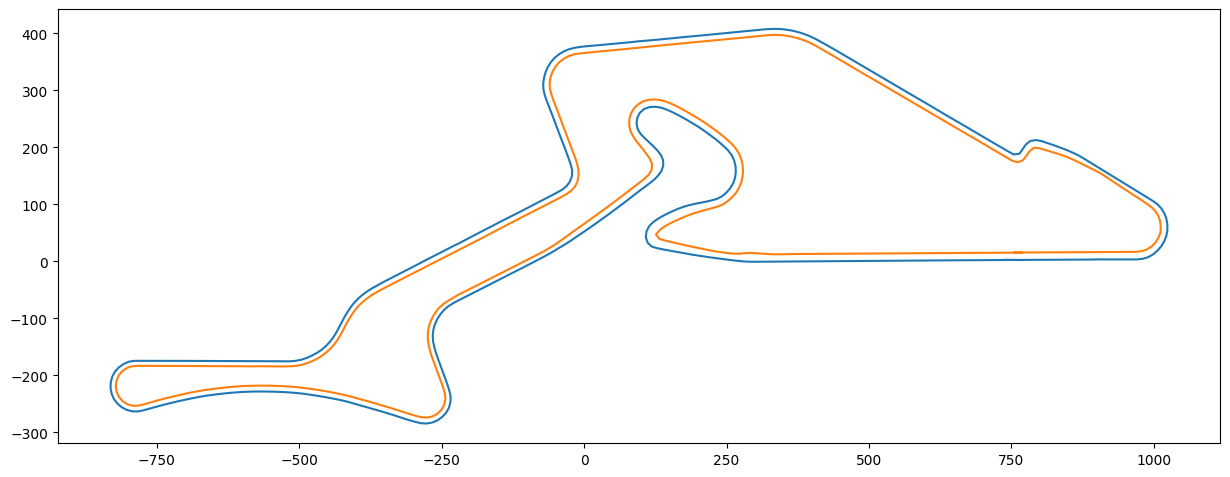

In [24]:
# Plot the reduced track in 2D using matplotlib
track_left_side, track_right_side = load_track_data(distance_pr_dot = 10)
fig, ax = plt.subplots()
ax.plot(track_left_side['X-Coords'],track_left_side['Y-Coords'])
ax.plot(track_right_side['X-Coords'],track_right_side['Y-Coords'] )
ax.set_aspect('equal')
fig.set_size_inches(15, 10)
plt.show()

In [33]:
# create a function which converts the dataframe to latitudinal and longitudinal coordinates

def convert_df_to_lat_long(left_df, right_df):
    # convert the dataframe to latitudinal and longitudinal coordinates

    return geo_df

geo_df = convert_df_to_lat_long(df)

NameError: name 'geo_df' is not defined

In [30]:

def summarize_graph(G):
    # Basic information
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    num_components = nx.number_connected_components(G)
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    
    # More detailed analysis
    components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    largest_component = max(components, key=len)
    diameter = nx.diameter(largest_component) if num_components == 1 else 'Undefined for disconnected graphs'
    density = nx.density(G)
    
    # Summary
    print(f'Number of Nodes: {num_nodes}')
    print(f'Number of Edges: {num_edges}')
    print(f'Number of Connected Components: {num_components}')
    print(f'Average Degree: {avg_degree:.2f}')
    print(f'Diameter of the Largest Component: {diameter}')
    print(f'Graph Density: {density:.4f}')


def create_left_right_pairs(df_left, df_right):
    pass

def is_point_within_track():
    pass


def create_track_network(df_left_reduced, df_right_reduced, grid_distance, diagonally_connected):
    
    # Interpolate boundaries
    left_spline_x, left_spline_y, right_spline_x, right_spline_y = create_cubic_splines(df_left_reduced, df_right_reduced)
    
    # Determine the vertical bounds of the track
    min_y = min(df_left_reduced['Y-Coords'].min(), df_right_reduced['Y-Coords'].min())
    max_y = max(df_left_reduced['Y-Coords'].max(), df_right_reduced['Y-Coords'].max())
    
    # Create the grid of nodes, checking if each is within track boundaries
    valid_nodes = []
    for y in np.arange(min_y, max_y, grid_distance):
        for x in np.arange(df_left_reduced['X-Coords'].min(), df_right_reduced['X-Coords'].max(), grid_distance):
            if REPLACE WITH FUNCTION TO CHECK IF POINT IS WITHIN TRACK:
                valid_nodes.append((x, y))

    # Create the network graph from the valid nodes
    G = nx.Graph()
    for node in valid_nodes:
        G.add_node(node)
    
    # Add edges based on grid_distance, include diagonals if specified
    directions = [(0, grid_distance), (grid_distance, 0)]
    if diagonally_connected:
        directions.extend([(grid_distance, grid_distance), (-grid_distance, grid_distance)])
    
    for node in valid_nodes:
        x, y = node
        for dx, dy in directions:
            neighbor = (x + dx, y + dy)
            if neighbor in valid_nodes:
                G.add_edge(node, neighbor)
    
    return G


G = create_track_network(track_left_side, track_right_side, grid_distance = 5, diagonally_connected= True)
summarize_graph(G)

ValueError: `x` must be strictly increasing sequence.

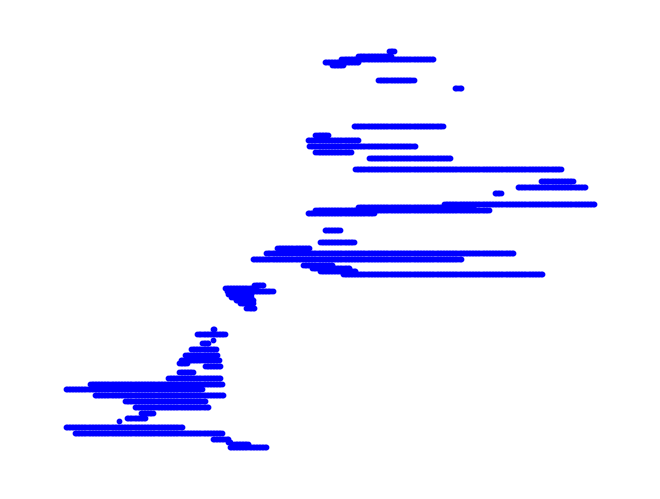

In [ ]:

def visualize_and_save_graph(G, file_name, dpi=300):
    # Set the size of the figure
    ax.set_aspect('equal')
    fig.set_size_inches(15, 15)
    plt.show()
    
    # Extract node positions from the graph G
    pos = {node: (node[0], node[1]) for node in G.nodes()}
    
    # Draw the network
    nx.draw(G, pos, node_size=10, width=1, with_labels=False, node_color='blue', edge_color='gray')
    
    plt.show()
    # Save the figure
    # plt.savefig(file_name, format='png', dpi=dpi, bbox_inches='tight')
    # plt.close()  # Close the figure to free memory

# Example usage:
visualize_and_save_graph(G, 'Data/Map_details/track_network.png', dpi=300)
